In [24]:
# !pip install pyarrow
# !pip install keras
# !pip install tsfresh
# !pip install sklearn
# !pip install Cython
# !pip install tslearn
!pip install keras-metrics

In [2]:
import tensorflow as tf
from sklearn.model_selection import train_test_split
from sklearn.manifold import TSNE
from sklearn.decomposition import PCA
from tsfresh import extract_features,select_features
from tsfresh import extract_relevant_features
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM
from keras.layers.embeddings import Embedding
from keras.preprocessing import sequence
# import tqdm as tqdm
from sklearn.model_selection import RandomizedSearchCV
from sklearn.ensemble import RandomForestClassifier

/usr/local/envs/py3env/lib/python3.5/site-packages/h5py/__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
/usr/local/envs/py3env/lib/python3.5/site-packages/statsmodels/compat/pandas.py:56: FutureWarning: The pandas.core.datetools module is deprecated and will be removed in a future version. Please use the pandas.tseries module instead.
  from pandas.core import datetools
Using TensorFlow backend.


In [3]:
TPU_WORKER = '10.0.10.2:8470'
session = tf.Session('grpc://' + TPU_WORKER,
config=tf.ConfigProto(isolate_session_state=True))

In [4]:


hello=tf.constant('Hello,TensorFlow!')

sess=tf.Session()

print(sess.run(hello))



b'Hello,TensorFlow!'


In [5]:
import pandas as pd

In [6]:
import matplotlib as mt
import numpy as np
import pyarrow as pa
import pyarrow.parquet as pq
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from keras.layers import *
from keras.models import Model

from sklearn.model_selection import train_test_split 
from keras import backend as K 
from keras import optimizers 
from keras.callbacks import  *

In [8]:

train1=pq.read_pandas('train1Scaled.parquet').to_pandas()

In [9]:
train2=train1.T

In [10]:
print(train2.head())

     0         1         2         3         4         5         6       \
0  0.791667  0.791667  0.777778  0.791667  0.791667  0.791667  0.805556   
1  0.553571  0.535714  0.517857  0.553571  0.535714  0.535714  0.553571   
2  0.134328  0.134328  0.119403  0.134328  0.134328  0.119403  0.149254   
3  0.472868  0.465116  0.465116  0.472868  0.472868  0.480620  0.472868   
4  0.479452  0.465753  0.465753  0.479452  0.479452  0.493151  0.479452   

     7         8         9         ...       799990    799991    799992  \
0  0.791667  0.791667  0.777778    ...     0.791667  0.791667  0.777778   
1  0.535714  0.535714  0.535714    ...     0.553571  0.535714  0.535714   
2  0.134328  0.119403  0.134328    ...     0.134328  0.119403  0.104478   
3  0.465116  0.457364  0.465116    ...     0.480620  0.480620  0.480620   
4  0.452055  0.452055  0.452055    ...     0.493151  0.493151  0.493151   

     799993    799994    799995    799996    799997    799998    799999  
0  0.777778  0.791667  0

In [11]:
del train1

In [12]:
meta1=pd.read_csv("metadata_train.csv")

In [13]:
import tsfresh as tsf
import tslearn as tsl
from tsfresh import extract_features

In [14]:
#this will be a target series
df1=meta1.target

In [15]:
#target as a dataframe
targ1=meta1['target']
df11=pd.DataFrame(targ1)

In [16]:
# pca2 = PCA(n_components=2)
# pc2 = pca2.fit_transform(train2)

In [17]:
# pcdf2 = pd.DataFrame(data =train2, columns = ['principal_component1','principal_component2'])
# plt.figure(figsize=(15,10))
# plt.title('PCA with 2 componenets')
# plt.xlabel('Principal Component 1')
# plt.ylabel('Principal Component 2')
# plt.scatter(pcdf2.principal_component1,pcdf2.principal_component2,edgecolor='none',alpha=0.5,c=df1)#.target)#deleted .target
# plt.grid

In [18]:
# %time
# #creates features
# #this might take  a lot of time
# #feat1 is a matrix of features generated for the entire set, if made we can make models
# train22 = train2.stack()
# train22 = train2.reset_index()
# train22.index.rename([ 'id', 'time' ], inplace = True )

# feat1 = extract_features( train22, column_id = 'id', column_sort = 'time' )

In [19]:
# i am reshaing the data to be used for neural network
# the shape should now be a 3-d array of the form 8712,800000,1
train2=np.array(train2)
train2=np.reshape(train2, train2.shape + (1,))
train2.shape

(8712, 800000, 1)

In [20]:
from keras.models import Sequential
from keras.layers import Dense
from keras.layers import LSTM

In [21]:
#neural network model
model = Sequential()
model.add(LSTM(4, input_shape=(800000,1)))
model.add(Dense(1))
model.compile(loss='mean_squared_error', optimizer='adam')
model

In [22]:
#training happens here
model.fit(train2, df1, epochs=2, batch_size=100, verbose=2)

Epoch 1/2
 - 37504s - loss: 0.0567
Epoch 2/2
 - 37664s - loss: 0.0565


In [90]:
# precision, recall scores, confusion  
!gsutil cp 'vsb55NN.ipynb' gs://pitt_ml_pd

Copying file://vsb55NN.ipynb [Content-Type=application/octet-stream]...
/ [1 files][ 30.2 KiB/ 30.2 KiB]                                                
Operation completed over 1 objects/30.2 KiB.                                     


In [103]:
# train24 = train2[0:1000,:,:]
train25 = train2[0:500,:,:]
test5 = train2[501:1001,:,:]
df15 = df1[0:500]
df15.shape
train25.shape

(500, 800000, 1)

In [83]:
# # list all data in history
# from keras.callbacks import History 
# print(model.History.keys())
# history.history['val_acc']
test_acc = model.evaluate(train25,df15)

500/500 [==============================] - 1389s 3s/step


In [84]:
print('Train accuracy:', test_acc)

Train accuracy: 0.06482597813755274


In [85]:
# print('Train loss:', test_loss)

In [86]:
pred7=model.predict(train25)

In [89]:
# print('Predicted:', pred7)

In [97]:
j=0

for i in range(len(pred7)):
  if pred7[i][0]>0.067:
    pred7[i][0]=1
  else:
    pred7[i][0]=0

In [98]:
pred7.ravel()

array([0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 1., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 1., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 0., 1., 0., 0., 1., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 1., 0., 0.

In [106]:
from sklearn.metrics import confusion_matrix, precision_score, recall_score
cm = confusion_matrix(df15, pred7)

In [107]:
print(cm)

[[429  36]
 [ 32   3]]


/usr/local/envs/py3env/lib/python3.5/site-packages/matplotlib/font_manager.py:1320: UserWarning: findfont: Font family ['sans-serif'] not found. Falling back to DejaVu Sans
  (prop.get_family(), self.defaultFamily[fontext]))


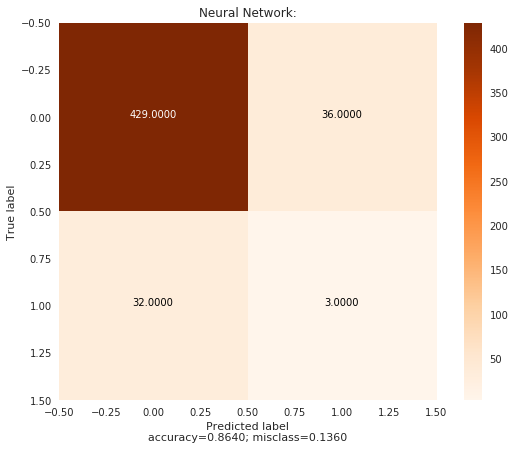

In [109]:
import itertools

accuracy = np.trace(cm) / float(np.sum(cm))
misclass = 1 - accuracy

plt.figure(figsize=(8, 6))
plt.imshow(cm, interpolation='nearest', cmap='Oranges')
plt.title("Neural Network:")
plt.colorbar()

# tick_marks = np.arange(len(target_names))
# plt.xticks(tick_marks, target_names, rotation=45)
# plt.yticks(tick_marks, target_names)

thresh = cm.max() / 1.5 #if normalize else cm.max() / 2
for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):

#   if normalize:
    plt.text(j, i, "{:0.4f}".format(cm[i, j]),
                     horizontalalignment="center",
                     color="white" if cm[i, j] > thresh else "black")
#   else:
#     plt.text(j, i, "{:,}".format(cm[i, j]),
#                      horizontalalignment="center",
#                      color="white" if cm[i, j] > thresh else "black")

plt.grid(b=None)
plt.tight_layout()
plt.ylabel('True label')
plt.xlabel('Predicted label\naccuracy={:0.4f}; misclass={:0.4f}'.format(accuracy, misclass))
plt.show()